### 1. Percentiles

In [7]:
from datascience import *
%matplotlib inline
path_data = 'https://raw.githubusercontent.com/Matthew-HMS/datascience_material/main/assets/data/'
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np

In [8]:
sizes = make_array(12, 17, 6, 9 ,7)

In [9]:
np.sort(sizes)

array([ 6,  7,  9, 12, 17], dtype=int64)

In [10]:
percentile(70, sizes)

12

In [11]:
scores_and_sections = Table.read_table(path_data + 'scores_by_section.csv')
scores_and_sections

Section,Midterm
1,22
2,12
2,23
2,14
1,20
3,25
4,19
1,24
5,8
6,14


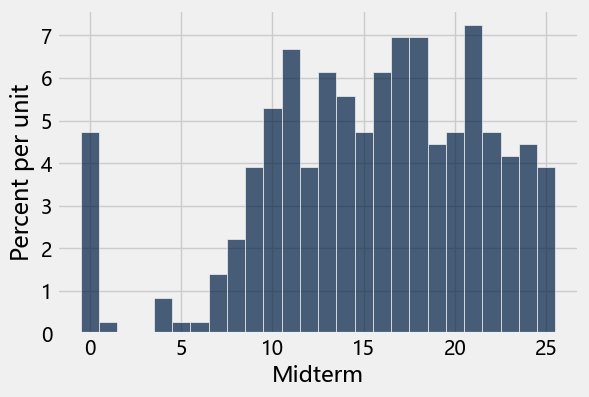

In [12]:
scores_and_sections.select('Midterm').hist(bins = np.arange(-0.5, 25.6, 1))

In [13]:
scores = scores_and_sections.column(1)

In [15]:
percentile(85, scores)

22

In [16]:
sorted_scores = np.sort(scores_and_sections.column(1))

In [17]:
0.85 * 359

305.15

In [18]:
sorted_scores.item(305)

22

In [19]:
percentile(25, scores)

11

In [20]:
percentile(50, scores)

16

In [21]:
percentile(75, scores)

20

### 2. The Bootstrap

In [22]:
from datascience import *
%matplotlib inline
path_data = 'https://raw.githubusercontent.com/Matthew-HMS/datascience_material/main/assets/data/'
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np

In [23]:
sf2019 = Table.read_table(path_data + 'san_francisco_2019.csv')

In [24]:
sf2019.show(3)

Organization Group,Department,Job Family,Job,Salary,Overtime,Benefits,Total Compensation
Public Protection,Adult Probation,Information Systems,IS Trainer-Journey,91332,0,40059,131391
Public Protection,Adult Probation,Information Systems,IS Engineer-Assistant,123241,0,49279,172520
Public Protection,Adult Probation,Information Systems,IS Business Analyst-Senior,115715,0,46752,162468


In [28]:
sf2019.where('Job', 'Mayor')

Organization Group,Department,Job Family,Job,Salary,Overtime,Benefits,Total Compensation
General Administration & Finance,Mayor,Administrative & Mgmt (Unrep),Mayor,342974,0,98012,440987


In [29]:
sf2019.sort('Total Compensation')

Organization Group,Department,Job Family,Job,Salary,Overtime,Benefits,Total Compensation
Public Protection,Adult Probation,Probation & Parole,Deputy Probation Officer,0,0,0,0
Public Protection,Fire Department,"Clerical, Secretarial & Steno",Senior Clerk Typist,0,0,0,0
Public Protection,Juvenile Court,Correction & Detention,"Counselor, Juvenile Hall PERS",0,0,0,0
Public Protection,Police,"Clerical, Secretarial & Steno",Clerk Typist,0,0,0,0
Public Protection,Sheriff,Correction & Detention,Deputy Sheriff,0,0,0,0
"Public Works, Transportation & Commerce",Airport Commission,Sub-Professional Engineering,StdntDsgn Train2/Arch/Eng/Plng,0,0,0,0
"Public Works, Transportation & Commerce",Airport Commission,"Clerical, Secretarial & Steno",Executive Secretary 1,0,0,0,0
"Public Works, Transportation & Commerce",Airport Commission,"Payroll, Billing & Accounting",Senior Account Clerk,0,0,0,0
"Public Works, Transportation & Commerce",Airport Commission,Housekeeping & Laundry,Custodian,0,0,0,0
"Public Works, Transportation & Commerce",Airport Commission,Housekeeping & Laundry,Custodian,0,0,0,0


In [30]:
sf2019 = sf2019.where('Salary', are.above(15000))

In [33]:
sf2019.num_rows

37103

c:\Users\Skywalker\AppData\Local\Programs\Python\Python310\lib\site-packages\datascience\tables.py:5865: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(ticks, rotation='vertical')


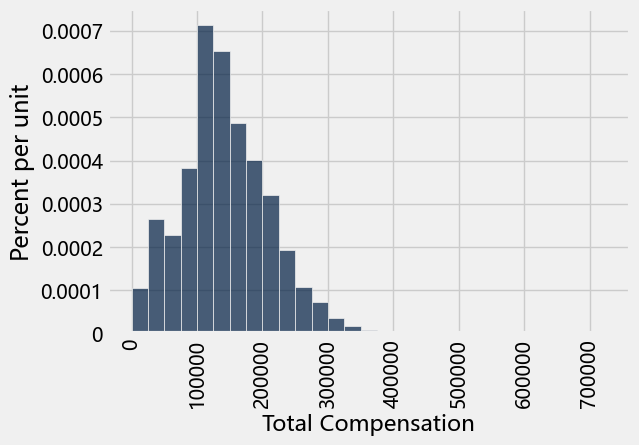

In [34]:
sf_bins = np.arange(0, 726000, 25000)
sf2019.select('Total Compensation').hist(bins = sf_bins)

In [36]:
sf2019.sort('Total Compensation', descending = True).show(2)

Organization Group,Department,Job Family,Job,Salary,Overtime,Benefits,Total Compensation
General Administration & Finance,Retirement Services,Administrative & Mgmt (Unrep),Chief Investment Officer,577633,0,146398,724031
General Administration & Finance,Retirement Services,Unassigned,Managing Director,483072,0,134879,617951


In [37]:
pop_median = percentile(50, sf2019.column('Total Compensation'))
pop_median

135747.0

c:\Users\Skywalker\AppData\Local\Programs\Python\Python310\lib\site-packages\datascience\tables.py:5865: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(ticks, rotation='vertical')


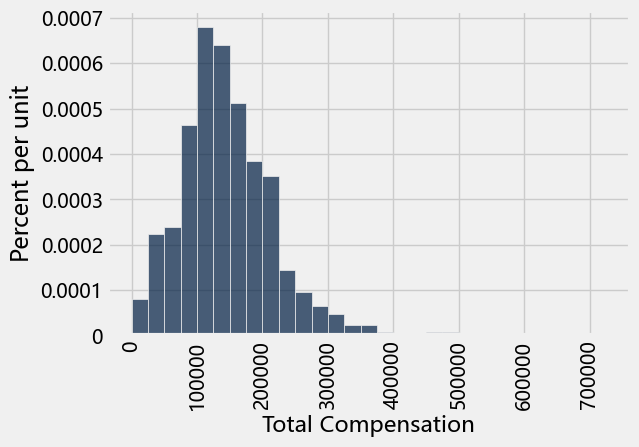

In [38]:
our_sample = sf2019.sample(500, with_replacement = False)
our_sample.hist('Total Compensation', bins = sf_bins)

In [39]:
est_median = percentile(50, our_sample.column('Total Compensation'))
est_median

134635.0